In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.api.types import CategoricalDtype
plt.rcParams.update({'font.size': 18})
df = pd.read_excel(r'C:\Users\Lenovo flex3\Downloads\cv-sample-3-combined-david-lucia.xlsx', sheet_name='All', engine='openpyxl')
dfa = pd.read_excel(r'C:\Users\Lenovo flex3\Downloads\cv-sample-3-combined-david-lucia.xlsx', sheet_name='analysis', engine='openpyxl')
df.drop(df.tail(1).index,inplace=True) # drop last n rows
dfa.drop(df.head(1).index,inplace=True) # drop first n rows
dfa.drop(dfa.tail(2).index,inplace=True) # drop last n rows
# df['set'] = df['set'].replace('coronavirus', '1-January').replace('cvq2', '2-February').replace('cv3-q', '3-March').replace('cv4-q', '4-April').replace('cv5-q', '5-May')
# df['set'] = df['set'].replace('coronavirus', 'January 2020').replace('cvq2', 'February 2020').replace('cv3-q', 'March 2020').replace('cv4-q', 'April 2020').replace('cv5-q', 'May 2020')
# df['set'] = df['set'].replace('coronavirus', 'January').replace('cvq2', 'February').replace('cv3-q', 'March').replace('cv4-q', 'April').replace('cv5-q', 'May')
df['set'] = df['set'].replace('coronavirus', 'Jan').replace('cvq2', 'Feb').replace('cv3-q', 'Mar').replace('cv4-q', 'Apr').replace('cv5-q', 'May')
for index, row in dfa.iterrows():
    df[row['All Sets']] = df['quote_category_lucia'].str.contains(row['All Sets'][0:3]) | df['quote_category_david'].str.contains(row['All Sets'][0:3])
df['share_type_lucia'] = df['share_type_lucia'].str.replace('disa', 'negative')
df['is_english'] = df['text_lang'].str.contains('en:0.9')
df['qs_english'] = df['quoted_text_lang'].str.contains('en:0.9')

In [ ]:
# topic line graphs
foo = pd.DataFrame(columns=['set', 'topic', 'count'])
for set in df.set.unique():
    dfb = df[df.set == set]
    for index, row in dfa.iterrows():
        foo = foo.append({'set': set, 'topic': row['All Sets'], 'cnt': dfb[row['All Sets']].value_counts().loc[True]}, ignore_index=True)

# months = {'coronavirus':'Jan', 'cvq2':'Feb', 'cv3-q':'Mar', 'cv4-q':'Apr', 'cv5-q':'May'}
# foo['month'] = foo.set.map(months)
for title, group in foo.groupby('topic'):
    group.plot(x='set', y='cnt', title=title, legend=False, ylabel='number of tweets', xlabel=title+' within month of 2020', linewidth=5, figsize=(7,5))
    
    plt.xticks(rotation = 0)

    set share_type count    cnt
2   Jan      agree   NaN  126.0
8   Feb      agree   NaN  172.0
14  Mar      agree   NaN  189.0
20  Apr      agree   NaN  228.0
26  May      agree   NaN  229.0


TypeError: plot got an unexpected keyword argument 'x'

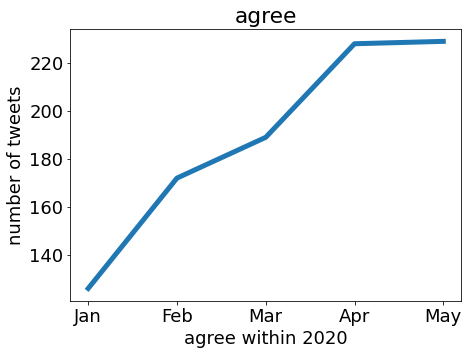

In [13]:
# share type line graphs
foo = pd.DataFrame(columns=['set', 'share_type', 'count'])
share_types = ['wow', 'com', 'agr', 'sim', 'dis', 'hum']
share_types_lucia = ['disb', 'disc', 'agr', 'sim', 'negative', 'hum']
share_types_names = ['disbelief', 'discussion', 'agree', 'simple', 'disagree', 'humor']
for i in range(len(share_types)):
    df[share_types_names[i]] = df['share_type_lucia'].str.contains(share_types_lucia[i]) | df['share_type_david'].str.contains(share_types[i])
#     print(df[share_types_names[i]])
for set in df.set.unique():
    dfb = df[df.set == set]
    for share_type in share_types_names:
        foo = foo.append({'set': set, 'share_type': share_type, 'cnt': dfb[share_type].value_counts().loc[True]}, ignore_index=True)
        
# months = {'coronavirus':'Jan', 'cvq2':'Feb', 'cv3-q':'Mar', 'cv4-q':'Apr', 'cv5-q':'May'}
# foo['month'] = foo.set.map(months)
for title, group in foo.groupby('share_type'):
    print(group)
    group.plot(x='set', y='cnt', title=title, legend=False, ylabel='number of tweets', xlabel=title+' within 2020', linewidth=5, figsize=(7,5))
    plt.plot(x='Jan, Feb', y=(50, 100))
    plt.xticks(rotation = 0)

In [ ]:
# topics bar chart percentage side by side
topics_df = pd.DataFrame(columns=['topic', 'count', 'og_count'])
for index, row in dfa.iterrows():
    if (row['All Sets'] != 'tip'):
        topics_df = topics_df.append({'topic': row['All Sets'], 'count': df[row['All Sets']].value_counts().loc[True] / 25, 'og_count': df[row['All Sets']].value_counts().loc[True]}, ignore_index=True)

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title("Combined Jan 2020 - May 2020")
topics_df = topics_df.sort_values('og_count', ascending = False)
ax.bar(topics_df['topic'].values,topics_df['count'].values)
plt.xticks(rotation = -80)
plt.ylim(0,75)
plt.xlabel('topic')
plt.ylabel('percentage of tweets')
plt.show()

for set in df.set.unique():
    dfb = df[df.set == set]
    topics_df = pd.DataFrame(columns=['topic', 'count', 'og_count'])
    for index, row in dfa.iterrows():
        if (row['All Sets'] != 'tip'):
            topics_df = topics_df.append({'topic': row['All Sets'], 'count': dfb[row['All Sets']].value_counts().loc[True] / 5, 'og_count': df[row['All Sets']].value_counts().loc[True]}, ignore_index=True)

    fig = plt.figure()
#     months = {'coronavirus':'Jan', 'cvq2':'Feb', 'cv3-q':'Mar', 'cv4-q':'Apr', 'cv5-q':'May'}
    ax = fig.add_axes([0,0,1,1])
    ax.set_title(set)
    topics_df = topics_df.sort_values('og_count', ascending = False)
    ax.bar(topics_df['topic'].values,topics_df['count'].values)
    plt.ylim(0,75)
    plt.xticks(rotation = -80)
    plt.xlabel('topic')
    plt.ylabel('percentage of tweets')
    plt.show()

In [ ]:
# share type bar chart side by side
share_types = ['sim', 'com', 'agr', 'dis', 'hum', 'wow']
share_types_lucia = ['sim', 'c', 'agr', 'negative', 'hum', 'disb']
share_types_names = ['simple', 'discussion', 'agree', 'disagree', 'humor', 'disbelief']
plt.rcParams.update({'font.size': 18})
for i in range(len(share_types)):
    df[share_types_names[i]] = df['share_type_lucia'].str.contains(share_types_lucia[i]) | df['share_type_david'].str.contains(share_types[i])

share_df = pd.DataFrame(columns=['share_type', 'count', 'og_count'])
for share_type in share_types_names:
#     if share_type == 'agree':
#         share_df = share_df.append({'share_type': share_type, 'count': (df[share_type].value_counts().loc[True] - df['disagree'].value_counts().loc[True]) / 25, 'og_count': (df[share_type].value_counts().loc[True] - df['disagree'].value_counts().loc[True]) / 25}, ignore_index=True)
#     else:
    share_df = share_df.append({'share_type': share_type, 'count': df[share_type].value_counts().loc[True] / 25, 'og_count': df[share_type].value_counts().loc[True] / 25}, ignore_index=True)

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title("Combined Jan 2020 - May 2020")
# share_df = share_df.sort_values('og_count', ascending = False)
ax.bar(share_df['share_type'].values,share_df['count'].values)
plt.xticks(rotation = -40)
plt.ylim(0,75)
plt.xlabel('share type')
plt.ylabel('percentage of tweets')
plt.show()

for set in df.set.unique():
    dfb = df[df.set == set]
    share_df = pd.DataFrame(columns=['share_type', 'count', 'og_count'])
    for share_type in share_types_names:
#         if share_type == 'agree':
#             share_df = share_df.append({'share_type': share_type, 'count': (dfb[share_type].value_counts().loc[True] - dfb['disagree'].value_counts().loc[True]) / 5, 'og_count': (df[share_type].value_counts().loc[True] - df['disagree'].value_counts().loc[True]) / 25}, ignore_index=True)
#         else:
        share_df = share_df.append({'share_type': share_type, 'count': dfb[share_type].value_counts().loc[True] / 5, 'og_count': df[share_type].value_counts().loc[True] / 5}, ignore_index=True)

    fig = plt.figure()
#     months = {'coronavirus':'Jan', 'cvq2':'Feb', 'cv3-q':'Mar', 'cv4-q':'Apr', 'cv5-q':'May'}
    ax = fig.add_axes([0,0,1,1])
    ax.set_title(set)  
#     share_df = share_df.sort_values('og_count', ascending = False)
    ax.bar(share_df['share_type'].values,share_df['count'].values)
    plt.xticks(rotation = -40)
    plt.ylim(0,75)
    plt.xlabel('share type')
    plt.ylabel('percentage of tweets')
    plt.show()

In [ ]:
share_types = ['wow', 'com', 'agr', 'sim', 'dis', 'hum']
share_types_lucia = ['disb', 'c', 'agr', 'sim', 'disa', 'hum']
share_types_names = ['disbelief', 'discussion', 'agree', 'simple', 'disagree', 'humor']
df['share_type_lucia'] = df['share_type_lucia'].replace('disa', 'x')
for i in range(len(share_types)):
    df[share_types_names[i]] = df['share_type_lucia'].str.contains(share_types_lucia[i]) | df['share_type_david'].str.contains(share_types[i])

for index, row in dfa.iterrows():
    foo = pd.DataFrame(columns=['set', 'topic', 'share_type', 'count'])
    for set in df.set.unique():
        dfb = df[df.set == set]
        foo = foo.append({'set': set, 'topic': row['All Sets'], 'share_type': 'Simple', 'count': len(dfb[(dfb[row['All Sets']]==True) & (dfb['simple']==True)])}, ignore_index=True)
        foo = foo.append({'set': set, 'topic': row['All Sets'], 'share_type': 'Discussion', 'count': len(dfb[(dfb[row['All Sets']]==True) & (dfb['discussion']==True)])}, ignore_index=True)
            
    cat = CategoricalDtype(categories=['Jan', 'Feb', 'Mar', 'Apr', 'May'], ordered=True)
    foo['set'] = foo['set'].astype(cat)
    pivot_df = foo.pivot(index='set', columns='share_type', values='count')
#     pivot_df['set'] = pivot_df['set'].replace('1', 'January').replace('cvq2', '2').replace('cv3-q', '3').replace('cv4-q', '4').replace('cv5-q', '5')
#     pivot_df.loc[:,share_types_names].plot.bar(stacked=True, figsize=(10,7))
    pivot_df.loc[:,['Simple', 'Discussion']].plot.bar(stacked=True, figsize=(7,5), title=row['All Sets'])
    plt.xticks(rotation = 0)
    plt.xlabel(row['All Sets'] +' within month of 2020')
    plt.ylabel('number of tweets')
    plt.show()


In [ ]:
share_types = ['wow', 'com', 'agr', 'sim', 'dis', 'hum']
share_types_lucia = ['disb', 'c', 'agr', 'sim', 'disa', 'hum']
share_types_names = ['disbelief', 'discussion', 'agree', 'simple', 'disagree', 'humor']
df['share_type_lucia'] = df['share_type_lucia'].replace('disa', 'x')
for i in range(len(share_types)):
    df[share_types_names[i]] = df['share_type_lucia'].str.contains(share_types_lucia[i]) | df['share_type_david'].str.contains(share_types[i])

for index, row in dfa.iterrows():
    foo = pd.DataFrame(columns=['set', 'topic', 'share_type', 'count'])
    for set in df.set.unique():
        dfb = df[df.set == set]
        foo = foo.append({'set': set, 'topic': row['All Sets'], 'share_type': 'Agree', 'count': len(dfb[(dfb[row['All Sets']]==True) & (dfb['agree']==True)])}, ignore_index=True)
        foo = foo.append({'set': set, 'topic': row['All Sets'], 'share_type': 'Disagree', 'count': len(dfb[(dfb[row['All Sets']]==True) & (dfb['disagree']==True)])}, ignore_index=True)
    cat = CategoricalDtype(categories=['Jan', 'Feb', 'Mar', 'Apr', 'May'], ordered=True)
    foo['set'] = foo['set'].astype(cat)
    pivot_df = foo.pivot(index='set', columns='share_type', values='count')
#     pivot_df['set'] = pivot_df['set'].replace('1', 'January').replace('cvq2', '2').replace('cv3-q', '3').replace('cv4-q', '4').replace('cv5-q', '5')
#     pivot_df.loc[:,share_types_names].plot.bar(stacked=True, figsize=(10,7))
    pivot_df.loc[:,['Agree', 'Disagree']].plot.bar(stacked=True, figsize=(7,5), title=row['All Sets'])
    plt.xticks(rotation = 0)
    plt.xlabel(row['All Sets'] +' within month of 2020')
    plt.ylabel('number of tweets')
    plt.show()

In [ ]:
for index, row in dfa.iterrows():
    foo = pd.DataFrame(columns=['set', 'topic', 'lang', 'count'])
    for set in df.set.unique():
        dfb = df[df.set == set]
        foo = foo.append({'set': set, 'topic': row['All Sets'], 'lang': 'English', 'count': len(dfb[(dfb[row['All Sets']]==True) & (dfb['qs_english']==True)])}, ignore_index=True)
        foo = foo.append({'set': set, 'topic': row['All Sets'], 'lang': 'Not English', 'count': len(dfb[(dfb[row['All Sets']]==True) & (dfb['qs_english']==False)])}, ignore_index=True)
    
    cat = CategoricalDtype(categories=['Jan', 'Feb', 'Mar', 'Apr', 'May'], ordered=True)
    foo['set'] = foo['set'].astype(cat)
    
    pivot_df = foo.pivot(index='set', columns='lang', values='count')
    pivot_df.plot.bar(stacked=True, figsize=(7,5), title=row['All Sets'])
    
    plt.xticks(rotation = 0)
    plt.xlabel(row['All Sets'] +' within month of 2020')
    plt.ylabel('number of tweets')
    plt.show()